# Introduccion

- Los modelos de aprendizaje automático tienen hiperparámetros que se deben configurar para ajustar el modelo a tu conjunto de datos.

- Frecuentemente, se conocen los efectos generales de los hiperparámetros en un modelo, pero cómo configurar de la mejor manera un hiperparámetro y las combinaciones de hiperparámetros interactivos para un conjunto de datos dado es un desafío. Suelen existir heurísticas generales o reglas empíricas para configurar hiperparámetros.

- Un mejor enfoque es buscar de manera objetiva diferentes valores para los hiperparámetros del modelo y elegir un subconjunto que resulte en un modelo que logre el mejor rendimiento en un conjunto de datos dado. Esto se llama **optimización de hiperparámetros** o **ajuste de hiperparámetros**. El resultado de una optimización de hiperparámetros es un conjunto único de hiperparámetros con un buen rendimiento que se puede usar para configurar el modelo.

# Para refrescar algunos conceptos

- Los modelos de aprendizaje automático tienen hiperparámetros.

- Los hiperparámetros son puntos de elección o configuración que permiten personalizar un modelo de aprendizaje automático para una tarea o conjunto de datos específicos.

- Hiperparámetro: Argumento de configuración del modelo especificado por el desarrollador para guiar el proceso de aprendizaje para un conjunto de datos específico.

- Los modelos de aprendizaje automático también tienen parámetros, que son los coeficientes internos establecidos mediante el entrenamiento u optimización del modelo en un conjunto de datos de entrenamiento.

- Los parámetros son diferentes de los hiperparámetros. Los parámetros se aprenden automáticamente; los hiperparámetros se configuran manualmente para ayudar a guiar el proceso de aprendizaje.

Ejemplo de algunos parametros: 

- Los coeficientes en una regresión lineal o logística.
- Los pesos en una red neuronal artificial.
- Los vectores de soporte en una máquina de vectores de soporte.

Ejemplo de algunos hiperparametros:

- El número de vecinos en k-vecinos más cercanos (k-nn).
- La profundidad máxima en un árbol de decisión

# Optimizacion de Hiperparametros

- Por lo tanto, es necesario buscar un conjunto de hiperparámetros que resulten en el mejor rendimiento de un modelo en un conjunto de datos. Esto se llama optimización de hiperparámetros, ajuste de hiperparámetros o búsqueda de hiperparámetros.

- Un procedimiento de optimización implica definir un espacio de búsqueda. Esto se puede pensar geométricamente como un volumen n-dimensional, donde cada hiperparámetro representa una dimensión diferente y la escala de la dimensión son los valores que el hiperparámetro puede tomar, como valores reales, enteros o categóricos.

- Espacio de Búsqueda: Volumen a ser explorado donde cada dimensión representa un hiperparámetro y cada punto representa una configuración del modelo.

- Un punto en el espacio de búsqueda es un vector con un valor específico para cada hiperparámetro. El objetivo del procedimiento de optimización es encontrar un vector que resulte en el mejor rendimiento del modelo después del aprendizaje, como la máxima precisión o el mínimo error.



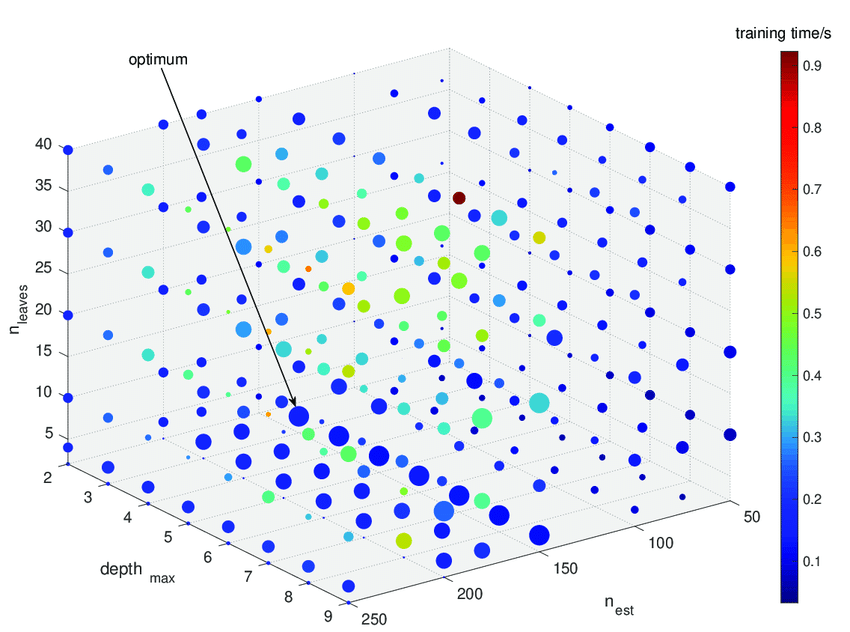

In [1]:
from IPython.display import Image
image_path = 'volumen_n.png'
Image(filename=image_path)

Tecnicas basicas:

**Grid Search:** 
- Define un espacio de búsqueda como una cuadrícula de valores de hiperparámetros y evalúa cada posición en la cuadrícula. 
- Grid Search es excelente para verificar combinaciones que se sabe que funcionan bien en general. 


**Random Search:** 
- Define un espacio de búsqueda como un dominio acotado de valores de hiperparámetros y muestrea puntos de manera aleatoria en ese dominio. 
- Random Search es excelente para descubrir y obtener combinaciones de hiperparámetros que no habriamos obtenido intuitivamente, aunque suele requerir más tiempo para ejecutarse.



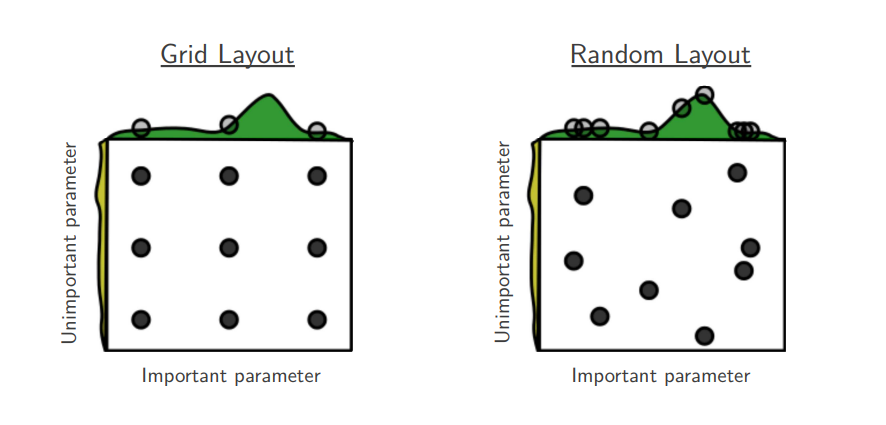

In [2]:
image_path = 'GS_RS.png'
Image(filename=image_path)

#### Ejemplo de Grid Search para Clasificacion

In [5]:
from pandas import read_csv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names
# Cargamos el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# dividimos el dataset en x e y
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

In [4]:
# definimos un modelo
model = LogisticRegression()

In [5]:
# definimos la forma de evaluar
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [6]:
# defino el espacio de busqueda
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 10, 100]

In [7]:
# defino la busqueda
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [8]:
# Ejecuto la busqueda
result = search.fit(X, y)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda

Best Score: 0.7828571428571429
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda

#### Ejemplo de Random Search para Clasificacion

In [6]:
from sklearn.model_selection import RandomizedSearchCV

In [9]:
# vuelvo a definir el espacio de busqueda
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [10]:
# Defino la busqueda
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)


In [11]:
# Ejecuto la busqueda
result = search.fit(X, y)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda

Best Score: 0.7897619047619049
Best Hyperparameters: {'C': 4.878363034905756, 'penalty': 'l2', 'solver': 'newton-cg'}


/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/julianculici/opt/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/julianculici/opt/anaconda

- En la práctica, la búsqueda en cuadrícula exhaustiva de todas las combinaciones posibles puede volverse computacionalmente costosa o incluso inmanejable si tienes muchos hiperparámetros con muchos valores posibles. 

- Por esta razón, es común utilizar técnicas de búsqueda más eficientes como métodos de optimización bayesiana para encontrar combinaciones de hiperparámetros que funcionen bien en un tiempo razonable.

# Optimizacion global: la optimización bayesiana

- En la práctica, la búsqueda en cuadrícula exhaustiva de todas las combinaciones posibles puede volverse computacionalmente costosa o incluso inmanejable si tienes muchos hiperparámetros con muchos valores posibles. 

- Por esta razón, es común utilizar técnicas de búsqueda más eficientes como métodos de optimización bayesiana para encontrar combinaciones de hiperparámetros que funcionen bien en un tiempo razonable.

La **optimización bayesiana** es una estrategia poderosa para encontrar los extremos de funciones objetivo que son costosas de evaluar. 

- Es aplicable en situaciones en las que no se tiene una expresión en forma cerrada para la función objetivo, pero en las que se pueden obtener observaciones (posiblemente ruidosas) de esta función en valores muestreados. 

- Es particularmente útil cuando estas evaluaciones son costosas, cuando no se tiene acceso a derivadas o cuando el problema en cuestión no es convexo.

La eficiencia de esta tecnica proviene de la capacidad para incorporar creencias previas sobre el problema. Esto ayuda a equilibrar la exploracion y la explotacion del espacio de busqueda.

El nombre se debe a que utiliza el "teorema de Bayes", ya que establece que la probabilidad posterior de un modelo M dado un conjunto de datos E es proporcional a la verosimilitud de E dado M multiplicada por la probabilidad previa de M

In [3]:
image_path = 'formula_1.png'
Image(filename=image_path)

- "La probabilidad posterior de un modelo M dado un conjunto de datos E": Esto se refiere a la probabilidad de que nuestro modelo M sea cierto (o sea la mejor elección) dada la evidencia o datos E que hemos recopilado. En el contexto de la optimización bayesiana, nuestro "modelo" podría ser una suposición sobre cómo se comporta la función objetivo que estamos tratando de optimizar.

- "Proporcional a la verosimilitud de E dado M multiplicada por la probabilidad previa de M": 

    - "Verosimilitud de E dado M": Esta parte se refiere a cuán probable es que hayamos observado nuestros datos E si nuestro modelo M es cierto. En otras palabras, ¿qué tan bien se ajustan nuestros datos a las suposiciones de nuestro modelo?

    - "Probabilidad previa de M": Esta parte se refiere a nuestras creencias iniciales sobre la probabilidad de que nuestro modelo M sea cierto antes de observar los datos. Es como una creencia inicial basada en información previa o suposiciones antes de obtener datos.

- El teorema de Bayes establece que la probabilidad posterior de nuestro modelo M se calcula multiplicando la verosimilitud de los datos bajo ese modelo por nuestra probabilidad previa para ese modelo. Esto nos permite actualizar nuestras creencias iniciales sobre el modelo a medida que observamos más datos.

- En el contexto de la optimización bayesiana, esto significa que a medida que recopilamos observaciones de la función objetivo (nuestros "datos"), podemos actualizar nuestras creencias sobre cómo es realmente esa función objetivo (nuestro "modelo") utilizando el teorema de Bayes. Esto nos ayuda a dirigir la búsqueda de la solución óptima de manera más efectiva.







**En otras palabras**

En el contexto de la optimización bayesiana, el teorema de Bayes se utiliza para actualizar las creencias sobre la función objetivo que se está tratando de optimizar. El proceso comienza con una creencia previa (prior) sobre cómo podría ser esa función objetivo, que generalmente se asume de manera probabilística. A medida que se recopilan observaciones o datos de la función objetivo, el teorema de Bayes se utiliza para actualizar la creencia previa y obtener una creencia posterior (posterior) más precisa.

**Ejemplo**

Un ejemplo de cómo se utiliza la optimización bayesiana en un problema de diseño unidimensional simplificado.
Las figuras muestran una aproximación de proceso gaussiano (GP) de la función objetivo a lo largo de cuatro iteraciones de valores muestreados de la función objetivo. 
La figura también muestra la función de adquisición en las gráficas sombreadas inferiores. La adquisición es alta donde el GP predice un alto valor objetivo (explotación) y donde la incertidumbre en la predicción es alta (exploración), y las áreas que tienen ambas características se muestrean primero. Observa que el área en el extremo izquierdo permanece sin muestrear, ya que, aunque tiene una alta incertidumbre, se predice (correctamente) que ofrecerá una mejora mínima en comparación con la observación más alta.

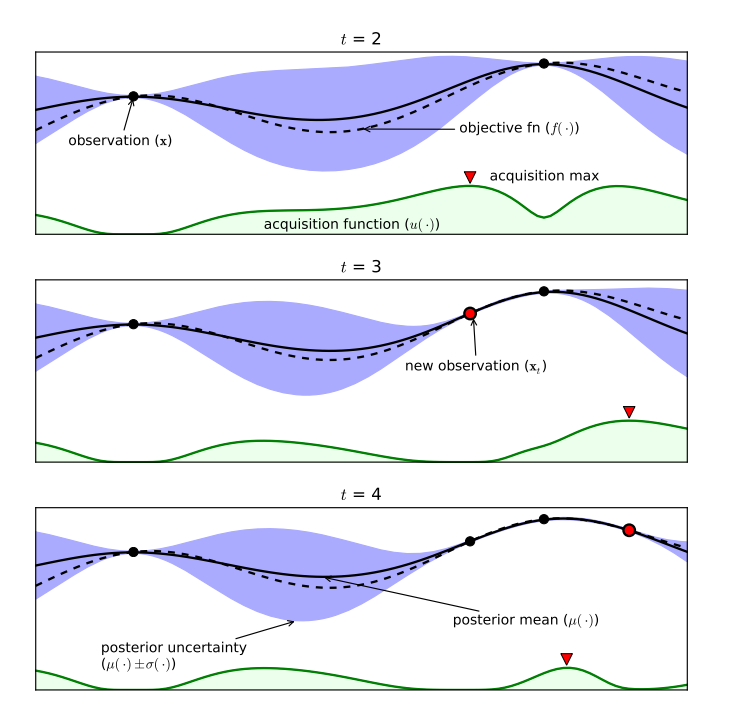

In [5]:
image_path = 'formula_2.png'
Image(filename=image_path)

# Ver recurso https://distill.pub/2020/bayesian-optimization/
# Mas teoria: https://arxiv.org/pdf/1012.2599.pdf
# Aun mas teoria: https://arxiv.org/pdf/2103.12715.pdf

# Una forma avanzada de optimizar hiperparámetros: la optimización bayesiana

<img src="montaña.jfif">

- La optimización bayesiana es una técnica para la búsqueda de los mejores hiperparámetros, alternativa al Grid Search y el Random Search.
- Permite llegar a óptimos muy cercanos al óptimo global, en una fracción del tiempo que nos llevaría hacerlo con un Grid Search.
- Es muy útil sobretodo en modelos como el XGBoost, con muchos hiperparámetros a optimizar.
- Típicamente son suficientes entre 50 y 100 iteraciones para alcanzar un desempeño muy cercano al óptimo.

Como funciona:
- Nos enfrentamos al problema de la optimización global de una función objetivo (**la búsqueda de los mejores hiperparámetros**). 
- La optimización bayesiana nos provee una técnica basada en el Teorema de Bayes, a fin de resolver este problema de optimización global, que sea a la vez eficaz y eficiente. **La función objetivo será la  métrica que querramos optimizar: AUC, F1, accuracy, etc.**
- Funciona construyendo un modelo probabilístico de la función objetivo, llamada función sustituta o *surrogate*. 
- Esta función surrogate se actualiza, a su vez, con una función de adquisición, que es la responsable de encontrar nuevos puntos para evaluar la función objetivo real.
- La función surrogate se basa en la *estadística bayesiana*, en el sentido de actualizar una probabilidad o creencia a priori a la luz de nueva información para generar una creencia o probabilidad a posteriori.


*El objetivo final es reducir el número de combinaciones de hiperparámetros con las que se evalúa el modelo, eligiendo únicamente los mejores candidatos.*

Formamos la función surrogate a partir de los puntos muestrados, siendo x el conjunto de hiperparámetros y c(x) la métrica a optimizar:

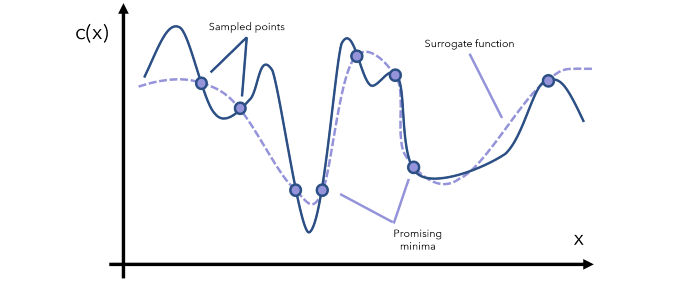

In [12]:
image_path = 'bo_1.png'
Image(filename=image_path)

Basados en la función surrogate, identificamos qué puntos son mínimos prometedores. Muestreamos más puntos de estas regiones prometedoras y actualizamos la función surrogate...


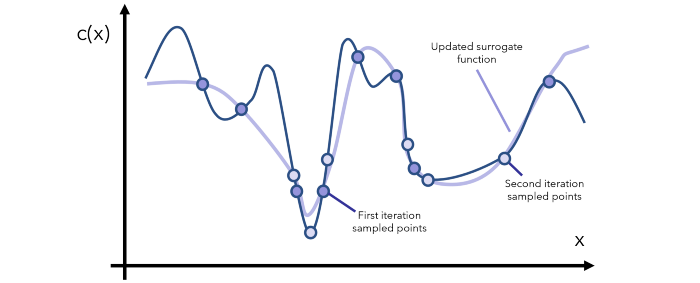

In [13]:
image_path = 'bo_2.png'
Image(filename=image_path)

La función de adquisición tiene un trade-off de exploración-explotación:
- La explotación busca casos adonde el modelo surrogate predice un buen valor de la métrica objetivo. Es decir, que saca provecho de una región conocida y prometedora.
- La exploración busca casos en lugares adonde hay mucha incertidumbre. Esto se asegura que no haya grandes regiones del espacio sin explorar.  

Una función de adquisición que alienta demasiada explotación con poca exploración llevará a un modelo con un mínimo local allá donde lo encuentre primero, mientras que una función de adquisición que aliente lo puesto nunca hallará un mínimo, ya sea local o global.


¿Quieren más teoría?
- https://machinelearningmastery.com/what-is-bayesian-optimization/
- https://towardsdatascience.com/the-beauty-of-bayesian-optimization-explained-in-simple-terms-81f3ee13b10f

### Hyperopt

Hyperopt es una poderosa biblioteca de Python para la optimización de hiperparámetros desarrollada por James Bergstra. Hyperopt utiliza una forma de optimización bayesiana para la sintonización de parámetros que te permite obtener los mejores parámetros para un modelo dado. Puede optimizar un modelo con cientos de parámetros a gran escala.

Hyperopt contiene 4 features importantes que necesitamos definir para correr la primera optimizacion

**Espacio de Búsqueda**

Hyperopt tiene diferentes funciones para especificar rangos de parámetros de entrada, estos son espacios de búsqueda estocásticos. Las opciones más comunes para elegir un espacio de búsqueda son las siguientes:

- hp.choice(label, options): Esto se puede usar para parámetros categóricos y devuelve una de las opciones, que debe ser una lista o tupla. Ejemplo: hp.choice("criterion", ["gini", "entropy"])

- hp.randint(label, upper): Esto se puede usar para parámetros enteros y devuelve un número entero aleatorio en el rango (0, upper). Ejemplo: hp.randint("max_features", 50)

- hp.uniform(label, low, high): Devuelve un valor uniformemente distribuido entre low y high. Ejemplo: hp.uniform("max_leaf_nodes", 1, 10)

- hp.normal(label, mu, sigma): Devuelve un valor real distribuido normalmente con media mu y desviación estándar sigma.

- hp.qnormal(label, mu, sigma, q): Devuelve un valor como round(normal(mu, sigma) / q) * q.

- hp.lognormal(label, mu, sigma): Devuelve un valor extraído de acuerdo con exp(normal(mu, sigma)).

- hp.qlognormal(label, mu, sigma, q): Devuelve un valor como round(exp(normal(mu, sigma)) / q) * q.


**Funcion objetivo**

- Esta es la función a minimizar que recibe valores de hiperparámetros como entrada desde el espacio de búsqueda y devuelve la pérdida. 

- Esto significa que durante el proceso de optimización, entrenamos el modelo con los valores de hiperparámetros seleccionados, realizamos predicciones sobre la característica objetivo y luego evaluamos el error de predicción y lo devolvemos al optimizador. 

- El optimizador decidirá qué valores verificar y volverá a iterar.

**Funcion fmin**

La función fmin es la función de optimización que itera en diferentes conjuntos de algoritmos y sus hiperparámetros y luego minimiza la función objetivo. La función fmin toma 5 entradas que son:

- La función objetivo a minimizar.

- El espacio de búsqueda definido.

- El algoritmo de búsqueda a utilizar, como la búsqueda aleatoria, TPE (Tree Parzen Estimators) y Adaptive TPE.

- El número máximo de evaluaciones.

- El objeto de pruebas (opcional).

**Objeto Trial**

- El objeto Trials se utiliza para mantener todos los hiperparámetros, la pérdida y otra información.

- Esto significa quee se puede acceder a esa informacion después de ejecutar la optimización. 

- Además, el objeto Trials puede ayudarte a guardar información importante y luego cargarla y reanudar el proceso de optimización más tarde.

**Ejemplo Practico**

In [7]:
! pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 kB/s eta 0:00:0000:0300:06mm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 kB/s eta 0:00:0000:0200:10m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 13.3 kB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 10.4 kB/s eta 0:00:00a 0:00:01
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=24f8e150c970d1715a1ab6557331e273a47fc77c071119a2afe9c68d4fb0083b
  Stored in directory: /Users/anoguera/Library/Caches/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [8]:
# importamos paquetes
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [16]:
# cargamos el dataset
data = pd.read_csv("mobile_price_data.csv")

In [17]:
# Vemos la data
# Info de la data: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
display(data.head())
print("shape:")
display(data.shape)
display(list(data.columns))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


shape:


(2000, 21)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [18]:
# Dividimos el data set en features y target

X = data.drop("price_range", axis=1).values 
y = data.price_range.values

In [19]:
# Estandarizamos las variables numericas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Definimos el espacio de busqueda
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [21]:
# Definimos la funcion objetivo

def hyperparameter_tuning(params):
    max_depth = int(params['max_depth'])  # Redondea max_depth a un entero
    n_estimators = params['n_estimators']
    criterion = params['criterion']
    
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, criterion=criterion, random_state=42)
    acc = cross_val_score(clf, X_scaled, y,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

# la funcion loss en negativo porque hyperopt minimiza

In [22]:
# Inicializamos el objeto trials
trials = Trials()

# Generamos la funcion fmin

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

#print("Best: {}".format(best))

100%|██████████| 20/20 [01:32<00:00,  4.60s/trial, best loss: -0.884]             


In [23]:
# Observamos los resultados
trials.results
print("Best: {}".format(best))

Best: {'criterion': 0, 'max_depth': 12.0, 'n_estimators': 1}


### Scikit-Optimize

- Scikit-optimize es otra biblioteca de Python de código abierto para la optimización de hiperparámetros que implementa varios métodos para la optimización secuencial basada en modelos.

- La biblioteca es muy fácil de usar y proporciona un conjunto de herramientas general para la optimización bayesiana que se puede utilizar para la optimizacion de hiperparámetros. 

- También ofrece soporte para ajustar los hiperparámetros de algoritmos de aprendizaje automático ofrecidos por la biblioteca scikit-learn.


Scikit-optimize contiene al menos cuatro features importantes que debemos definir para ejecutar la primera optimización.

**Espacio de Busqueda**

Scikit-optimize tiene diferentes funciones para definir el espacio de busqueda que puede contener una o varias dimensiones. Las opciones más comunes para elegir un espacio de búsqueda son:

Real: Esta es una dimensión del espacio de búsqueda que puede tomar cualquier valor real. Se debe definir el límite inferior y el límite superior, y ambos son inclusivos.
- Ejemplo: Real(low=0.2, high=0.9, name="min_samples_leaf")

Entero: Esta es una dimensión del espacio de búsqueda que puede tomar valores enteros.
- Ejemplo: Integer(low=3, high=25, name="max_features")

Categórico: Esta es una dimensión del espacio de búsqueda que puede tomar valores categóricos.
- Ejemplo: Categorical(["gini", "entropy"], name="criterion")



**BayesSearchCV**

- La clase BayesSearchCV proporciona una interfaz similar a GridSearchCV o RandomizedSearchCV, pero realiza una optimización bayesiana de hiperparámetros. 

- BayesSearchCV implementa un método "fit" y un método "score", así como otros métodos comunes (predict(), predict_proba(), decision_function(), transform() e inverse_transform()) si están implementados en el estimador utilizado.

- A diferencia de GridSearchCV, no se prueban todos los valores de los parámetros, sino que se muestrea un número fijo de configuraciones de parámetros de las distribuciones especificadas. 

- El número de configuraciones de parámetros que se prueban está dado por n_iter.

**Función Objetivo**

- Esta es una función que será llamada por el procedimiento de búsqueda. 

- Recibe valores de hiperparámetros como entrada desde el espacio de búsqueda y devuelve la pérdida. 

- Esto significa que durante el proceso de optimización, entrenamos el modelo con los valores de hiperparámetros seleccionados, realizamos predicciones sobre la característica objetivo y luego evaluamos el error de predicción y lo devolvemos al optimizador. 

- El optimizador decidirá qué valores verificar y volverá a iterar.

**Optimizer**

- Esta es la función que realiza el proceso de Optimización Bayesiana de Hiperparámetros. 

- La función de optimización itera en cada modelo y en el espacio de búsqueda para optimizar y luego minimiza la función objetivo.

La biblioteca scikit-optimize proporciona diferentes funciones de optimización, como:

- dummy_minimize: Búsqueda aleatoria mediante muestreo uniforme dentro de los límites dados.
- forest_minimize: Optimización secuencial utilizando árboles de decisión.
- gbrt_minimize: Optimización secuencial utilizando árboles mejorados por gradiente.
- gp_minimize: Optimización bayesiana utilizando Procesos Gaussianos.

**Ejemplo Practico**

In [9]:
! pip install scikit-optimize

In [10]:
from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize

In [11]:
import numpy as np

In [27]:
# definimos el espacio de busqueda
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": (1, 9),
    "criterion": ["gini", "entropy"],
}

In [28]:
#Definimos el clasificador
rf_classifier = RandomForestClassifier() 

In [29]:
# definimos la busqueda
search = BayesSearchCV(
    estimator=rf_classifier,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)

In [30]:
# perform the search
# Replaced all np.int with int in the file 'anaconda3\envs\myenv\Lib\site-packages\skopt\space\transformers.py'
search.fit(X_scaled,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.863 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.880 total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.890 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.855 total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.848 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.868 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.875 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.897 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.868 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
              random_state=42, scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': (1, 9),
                             'n_estimators': [100, 200, 300, 400]},
              verbose=4)

In [31]:
# vemos los mejores resultados
print(search.best_score_)
print(search.best_params_)

0.8815000000000002
OrderedDict([('criterion', 'entropy'), ('max_depth', 9), ('n_estimators', 400)])


### Optuna

- Optuna es un hyperparameter optimization software framework diseñado específicamente para pipelines de aprendizaje automático.

- Optuna permite a los usuarios adoptar algoritmos de vanguardia para muestrear hiperparámetros y podar ensayos poco prometedores. 

- Esto ayuda a acelerar significativamente el tiempo y el rendimiento de la optimización en comparación con métodos tradicionales como GridSearch. También permite a los usuarios representar gráficamente los historiales de optimización para una mejor comprensión del modelo.


**Por defecto, Optuna implementa un algoritmo de optimización bayesiana, pero se puede cambiar fácilmente a otros algoritmos existentes en el paquete.**


1) En primer lugar, selecciona aleatoriamente un subconjunto de hiperparámetros y los ordena en función de sus puntajes.

2) Los hiperparámetros se dividen aún más en dos grupos según algún cuantil predefinido.

3) Luego, los dos grupos se modelan en densidades estimadas con alguna funcion de adquisicion.

4) Se localizan los hiperparámetros con la mayor mejora esperada.

5) Los hiperparámetros con la mayor mejora esperada se evalúan, ordenan y dividen nuevamente. Este proceso se repite hasta que se agote el presupuesto, y se devolverán los mejores hiperparámetros.

Otros algoritmos:
- NSGAIISampler (Non-dominated sorting genetic algorithm II)
- CMA-ES Sampler
- MOTPE Sampler

**Ejemplo Practico**

In [12]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.10.0 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 8.5 kB/s eta 0:00:0000:0100:02


In [13]:
from sklearn.datasets import load_digits
import optuna
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
# Cargamos el dataset de numeros
digits = load_digits()
x, y = digits.data, digits.target
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
display(x[0])
display(y[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

0

In [35]:

#Definimos funcion objetivo
def objective(trial):
    digits = load_digits()
    x, y = digits.data, digits.target
    max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
    max_samples = trial.suggest_float("rf_max_samples", 0.2, 1)
   
    rf_model = RandomForestClassifier(
        max_depth = max_depth,
        max_samples = max_samples,
        n_estimators = 50,
        random_state = 42)
    score = cross_val_score(rf_model, x, y,  cv=3).mean()
    return score

In [36]:
# Generamos el study con optuna
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2023-09-06 21:29:14,399] A new study created in memory with name: no-name-05aa53c8-2002-4e2c-bcb7-e95e52bfd2b1
[I 2023-09-06 21:29:14,741] Trial 0 finished with value: 0.9337785197551475 and parameters: {'rf_max_depth': 24, 'rf_max_samples': 0.5353889410684385}. Best is trial 0 with value: 0.9337785197551475.
[I 2023-09-06 21:29:14,957] Trial 1 finished with value: 0.8035614913745132 and parameters: {'rf_max_depth': 2, 'rf_max_samples': 0.3546993489543837}. Best is trial 0 with value: 0.9337785197551475.
[I 2023-09-06 21:29:15,231] Trial 2 finished with value: 0.9181969949916527 and parameters: {'rf_max_depth': 7, 'rf_max_samples': 0.30279233260810134}. Best is trial 0 with value: 0.9337785197551475.
[I 2023-09-06 21:29:15,529] Trial 3 finished with value: 0.9282136894824707 and parameters: {'rf_max_depth': 7, 'rf_max_samples': 0.4483613277715606}. Best is trial 0 with value: 0.9337785197551475.
[I 2023-09-06 21:29:15,797] Trial 4 finished with value: 0.9154145798553145 and paramete

Best Score:  0.9488035614913745
Best Params: 
  rf_max_depth: 55
  rf_max_samples: 0.8300097762589367


In [37]:
# Podemos observar como se relaciona el valor objetivo con los hiperparametros
optuna.visualization.plot_contour(study)

In [ ]:
# En el caso que no encuentre modulo llamado plotly
#conda activate itba_apa_env
#conda install -c plotly plotly

In [38]:
#Observamos la importancia de cada parametro
optuna.visualization.plot_param_importances(study)

## Competencia de los modelos

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import auc, RocCurveDisplay 
from xgboost import XGBClassifier

In [ ]:
#Obtenemos el dataset

data_raw = pd.read_csv('./Data/datasets_222487_478477_framingham.csv')
data = data_raw.dropna()
data#.shape

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
#Proporción de clase
data.TenYearCHD.value_counts() / data_raw.shape[0]

0    0.731241
1    0.131430
Name: TenYearCHD, dtype: float64

In [ ]:
# Veo los datos y separo en test y train
# https://www2.stat.duke.edu/courses/Fall18/sta210.001/cardiovascular_logistic_analysis.html
display(data.dtypes)
display(data.head())
X=data.drop(["TenYearCHD"],axis=1)
y=data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=717)
X_test.reset_index(inplace=True,drop=True)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Grid Search**

In [ ]:
# Probamos con grid search
from sklearn.model_selection import GridSearchCV
#space= {'learning_rate': [0.01, 0.2, 0.4, 0.5, 0.6, 1.0],
#                 'max_depth':[2, 4, 6, 8, 10, 12],
#                 'subsample': [0.01, 0.2, 0.4, 0.5, 0.6, 1.0],
#                 'colsample_bytree': [0.01, 0.2, 0.4, 0.5, 0.6, 1.0], # subsample ratio of columns by tree
#                 'reg_lambda': [1e-9, 1e-6, 1e-4, 1e-2, 1, 10, 100], # L2 regularization
#                 'reg_alpha': [1e-9, 1e-6, 1e-4, 1e-2, 1, 10, 100], # L1 regularization
#                 'n_estimators': [50, 150, 300, 350, 400, 500]
#   }

space= {'learning_rate': [0.01, 1.0],
                 'max_depth':[2, 12],
                 'subsample': [0.01, 1.0],
                 'colsample_bytree': [0.01, 1.0], # subsample ratio of columns by tree
                 'reg_lambda': [1e-9,  100], # L2 regularization
                 'reg_alpha': [1e-9, 100], # L1 regularization
                 'n_estimators': [50, 500]
                 }


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

search = GridSearchCV(XGBClassifier(), space, scoring='accuracy', n_jobs=-1, cv=cv)

In [ ]:
# Ejecuto la busqueda
result = search.fit(X_train, y_train)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.849811580882353
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 1.0, 'max_depth': 12, 'n_estimators': 500, 'reg_alpha': 1e-09, 'reg_lambda': 100, 'subsample': 0.01}


**Random Search**

In [ ]:
# Probamos con random search
from scipy.stats import uniform, randint
search_space = {
    'learning_rate': uniform(0.01, 1.0),
    'max_depth': randint(2, 13),  # Randint para enteros entre 2 y 12 (12 exclusivo)
    'subsample': uniform(0.1, 1.0),
    'colsample_bytree': uniform(0.1, 1.0),
    'reg_lambda': uniform(1e-9, 100.),
    'reg_alpha': uniform(1e-9, 100.),
    'n_estimators': randint(50, 1001)  # Randint para enteros entre 50 y 1000 (1001 exclusivo)
}


from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(XGBClassifier(), search_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
# Ejecuto la busqueda
result = search.fit(X_train, y_train)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8504631331699347
Best Hyperparameters: {'colsample_bytree': 0.7979371211439983, 'learning_rate': 0.7636104801986124, 'max_depth': 9, 'n_estimators': 916, 'reg_alpha': 13.4606150133187, 'reg_lambda': 80.7699032176897, 'subsample': 0.20466861340722767}


**Hyperopt**

In [ ]:
# Probamos con Hyperopt
from hyperopt import fmin, tpe, hp

# Define el espacio de búsqueda para Hyperopt
search_space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0),
    'max_depth': hp.randint('max_depth', 2, 13),  # randint para enteros entre 2 y 12 (12 exclusivo)
    'subsample': hp.uniform('subsample', 0.1, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 1e-9, 100.),
    'reg_alpha': hp.uniform('reg_alpha', 1e-9, 100.),
    'n_estimators': hp.randint('n_estimators', 50, 1001)  # randint para enteros entre 50 y 1000 (1001 exclusivo)
}
# Definimos la funcion objetivo

def hyperparameter_tuning(params):
    learning_rate = params['learning_rate']
    max_depth = int(params['max_depth'])  # Redondea max_depth a un entero
    subsample = params['subsample']
    colsample_bytree = params['colsample_bytree']
    reg_lambda = params['reg_lambda']
    reg_alpha = params['reg_alpha']
    n_estimators = params['n_estimators']
    
    clf = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,subsample=subsample, colsample_bytree=colsample_bytree,
                                 reg_lambda=reg_lambda, reg_alpha=reg_alpha, random_state=42)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

# la funcion loss en negativo porque hyperopt minimiza
# Inicializamos el objeto trials
trials = Trials()

# Generamos la funcion fmin

best = fmin(
    fn=hyperparameter_tuning,
    space = search_space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 50/50 [00:59<00:00,  1.19s/trial, best loss: -0.8511137781311154]
Best: {'colsample_bytree': 0.24486741317684427, 'learning_rate': 0.5614776790903229, 'max_depth': 5, 'n_estimators': 893, 'reg_alpha': 14.297096912249943, 'reg_lambda': 88.50329309006531, 'subsample': 0.5305484361206437}


**Scikit-optimize**

In [ ]:
# Probamos con scikit-optimize
# Inicializamos el espacio de búsqueda de hiperparámetros

from skopt.space import Integer, Real,Categorical
search_space = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 1000)
   }

In [ ]:
from skopt import BayesSearchCV

#Instanciamos el objeto BayesSearchCV
opt = BayesSearchCV(
    XGBClassifier(),
    search_spaces=search_space,
    scoring='accuracy',
    n_iter=50,
    cv=5,
    random_state=42
)

#Ajustamos el objeto
opt.fit(X_train, y_train)

print("val. score: %s" % round(opt.best_score_,5))
print("test score: %s" % round(opt.score(X_test, y_test),5))

val. score: 0.84916
test score: 0.85141


**Optuna**

In [ ]:
#Definimos funcion objetivo
import xgboost as xgb
def objective(trial):
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 12),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 1e-9, 100.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 1e-9, 100.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'objective': 'binary:logistic'  # Opción específica para clasificación binaria
    }

    clf = XGBClassifier(**params, random_state=42)
    acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
    return -acc  # Optuna busca minimizar, por lo que invertimos la métrica

# Inicializamos el estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutamos la optimización
study.optimize(objective, n_trials=20)

# Obtenemos los mejores hiperparámetros
best_params = study.best_params
print("Best parameters:", best_params)
best_accuracy = -study.best_value  # Invertimos el valor para obtener la precisión real
print("Best accuracy:", best_accuracy)

[I 2023-09-06 20:03:10,818] A new study created in memory with name: no-name-b62cbcce-4ff2-4eab-abc4-dcbf85e16218
[I 2023-09-06 20:03:11,088] Trial 0 finished with value: -0.847647881112033 and parameters: {'learning_rate': 0.9353428693510315, 'max_depth': 4, 'subsample': 0.385900369197827, 'colsample_bytree': 0.4805368984525322, 'reg_lambda': 97.9831564483743, 'reg_alpha': 54.234331178186885, 'n_estimators': 97}. Best is trial 0 with value: -0.847647881112033.
[I 2023-09-06 20:03:12,775] Trial 1 finished with value: -0.8369827992195734 and parameters: {'learning_rate': 0.9073118183901296, 'max_depth': 12, 'subsample': 0.7729063207297362, 'colsample_bytree': 0.16928227840487592, 'reg_lambda': 41.814865928048604, 'reg_alpha': 4.015537175166318, 'n_estimators': 559}. Best is trial 0 with value: -0.847647881112033.
[I 2023-09-06 20:03:13,122] Trial 2 finished with value: -0.8503834854567065 and parameters: {'learning_rate': 0.25637936883572393, 'max_depth': 2, 'subsample': 0.6712915798179

Best parameters: {'learning_rate': 0.37728325199016594, 'max_depth': 2, 'subsample': 0.6872686366850974, 'colsample_bytree': 0.7597512119297195, 'reg_lambda': 64.45640568555353, 'reg_alpha': 26.885277055789754, 'n_estimators': 337}
Best accuracy: 0.8512039051228573


**Conclusiones de la competencia**
- Accuracy Grid Search: 0.8501986176610027

- Accuracy Random Search: 0.8502904409012652

- Accuracy Hyperopt: 0.8514775029340749

- Accuracy Scikit-optimize: 0.84916

- Accuracy Optuna: 0.8520254460915133

### Ejercicio

El Sloan Digital Sky Survey es un proyecto que ofrece datos públicos de observaciones espaciales. Las observaciones se han realizado desde 1998 y están disponibles para cualquiera que esté interesado.

Con este propósito, se construyó un telescopio especial con un diámetro de 2,5 metros en el Observatorio Apache Point en Nuevo México, Estados Unidos. El telescopio utiliza una cámara con 30 chips CCD de 2048x2048 píxeles cada uno. Los chips están dispuestos en 5 filas, con 6 chips en cada fila. Cada fila observa el espacio a través de diferentes filtros ópticos (u, g, r, i, z) a longitudes de onda de aproximadamente 354, 476, 628, 769, 925 nm.

El telescopio cubre aproximadamente un cuarto del cielo de la Tierra, por lo tanto, se enfoca en la parte norte del cielo.

Intentaremos clasificar las observaciones del espacio como estrellas, galaxias o cuásares

Utilizar los distintos metodos de optimizacion de hiperparametros que vimos en clase y comparar los resultados

In [29]:
# https://www.kaggle.com/code/lucidlenn/data-analysis-and-classification-using-xgboost
df = pd.read_csv('datos_practica.csv', skiprows=0)

In [30]:
# Clase a predecir - Columna "Class"
# Tener en cuenta que es multiclase la clasificacion
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [31]:
df.info() 
# No tiene nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [32]:
#Proporción de clase
df['class'].value_counts() / df.shape[0]

class
GALAXY    0.4998
STAR      0.4152
QSO       0.0850
Name: count, dtype: float64

La base tiene un desbalanceo extremo: La clase QSO representa menos del 1% de los casos.

In [33]:
df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

In [34]:
x = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state=42)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

X_train, y_train = ros.fit_resample(X_train, y_train)

print('Resample dataset shape', Counter(y_train))

Original dataset shape Counter({0: 4998, 1: 4152, 2: 850})
Resample dataset shape Counter({0: 4002, 1: 4002, 2: 4002})


GridSearch:

In [36]:
# Espacio de Busqueda
space= {'learning_rate': [0.01, 1.0],
                 'max_depth':[2, 12],
                 'subsample': [0.01, 1.0],
                 'colsample_bytree': [0.01, 1.0], # subsample ratio of columns by tree
                 'reg_lambda': [1e-9,  100], # L2 regularization
                 'reg_alpha': [1e-9, 100], # L1 regularization
                 'n_estimators': [50, 500]
                 }

# Modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# GridSearch
search = GridSearchCV(XGBClassifier(), space, scoring='accuracy', n_jobs=-1, cv=cv)

In [37]:
# Ejecuto la busqueda
result = search.fit(X_train, y_train)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9964461328522528
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 500, 'reg_alpha': 1e-09, 'reg_lambda': 100, 'subsample': 1.0}


In [39]:
gsscore = result.best_score_
gsparams = result.best_params_

RandomSearch:

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

space = {
    'learning_rate': uniform(0.01, 1.0),
    'max_depth': randint(2, 13),  # Randint para enteros entre 2 y 12 (12 exclusivo)
    'subsample': uniform(0.1, 1.0),
    'colsample_bytree': uniform(0.1, 1.0),
    'reg_lambda': uniform(1e-9, 100.),
    'reg_alpha': uniform(1e-9, 100.),
    'n_estimators': randint(50, 1001)  # Randint para enteros entre 50 y 1000 (1001 exclusivo)
}

search = RandomizedSearchCV(XGBClassifier(), space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [43]:
# Ejecuto la busqueda
result = search.fit(X_train, y_train)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9958631233231567
Best Hyperparameters: {'colsample_bytree': 0.5408283173513615, 'learning_rate': 0.490278182771684, 'max_depth': 10, 'n_estimators': 866, 'reg_alpha': 0.8912676643852978, 'reg_lambda': 50.54639298422316, 'subsample': 0.7731472823893418}


In [44]:
rsscore = result.best_score_
rsparams = result.best_params_

Hyperopt:

In [46]:
%%capture
# Probamos con Hyperopt
from hyperopt import fmin, tpe, hp

# Define el espacio de búsqueda para Hyperopt
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0),
    'max_depth': hp.randint('max_depth', 2, 13),  # randint para enteros entre 2 y 12 (12 exclusivo)
    'subsample': hp.uniform('subsample', 0.1, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 1e-9, 100.),
    'reg_alpha': hp.uniform('reg_alpha', 1e-9, 100.),
    'n_estimators': hp.randint('n_estimators', 50, 1001)  # randint para enteros entre 50 y 1000 (1001 exclusivo)
}
# Definimos la funcion objetivo

def hyperparameter_tuning(params):
    learning_rate = params['learning_rate']
    max_depth = int(params['max_depth'])  # Redondea max_depth a un entero
    subsample = params['subsample']
    colsample_bytree = params['colsample_bytree']
    reg_lambda = params['reg_lambda']
    reg_alpha = params['reg_alpha']
    n_estimators = params['n_estimators']
    
    clf = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,subsample=subsample, colsample_bytree=colsample_bytree,
                                 reg_lambda=reg_lambda, reg_alpha=reg_alpha, random_state=42)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}


In [51]:
# la funcion loss en negativo porque hyperopt minimiza
# Inicializamos el objeto trials
trials = Trials()

# Generamos la funcion fmin

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)


100%|██████████| 50/50 [07:16<00:00,  8.74s/trial, best loss: -0.9960018740456811]


In [62]:
best_score = hyperparameter_tuning(best) 

In [70]:
best_score = -best_score.get('loss')

In [71]:
print('Best Score: %s' % best_score)
print("Best Hyperparameters: {}".format(best))

Best Score: 0.9960018740456811
Best Hyperparameters: {'colsample_bytree': 0.5669541016763127, 'learning_rate': 0.5638791892160608, 'max_depth': 12, 'n_estimators': 640, 'reg_alpha': 0.14290262838991016, 'reg_lambda': 42.725254327184295, 'subsample': 0.6587399944767981}


In [72]:
hoscore = best_score
hoparams = format(best)

Scikit-optimize:

In [73]:
# Espacio de Busqueda
from skopt.space import Integer, Real,Categorical
space = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 1000)
   }

In [74]:
from skopt import BayesSearchCV

# BayesSearchCV
opt = BayesSearchCV(
    XGBClassifier(),
    search_spaces=space,
    scoring='accuracy',
    n_iter=50,
    cv=5,
    random_state=42
)

# Ejecuto la busqueda
result = search.fit(X_train, y_train)
# Resumo los resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9958631233231567
Best Hyperparameters: {'colsample_bytree': 0.5408283173513615, 'learning_rate': 0.490278182771684, 'max_depth': 10, 'n_estimators': 866, 'reg_alpha': 0.8912676643852978, 'reg_lambda': 50.54639298422316, 'subsample': 0.7731472823893418}


In [75]:
skscore = result.best_score_
skparams = result.best_params_

Optuna:

In [81]:
# Funcion Objetivo
def objective(trial):
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 12),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 1e-9, 100.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 1e-9, 100.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'objective': 'binary:logistic'  # Opción específica para clasificación binaria
    }

    clf = XGBClassifier(**params, random_state=42)
    acc = cross_val_score(clf, x, y, scoring="accuracy").mean()
    return -acc  # Optuna busca minimizar, por lo que invertimos la métrica

# Optuna study
study = optuna.create_study(direction='minimize')

[I 2023-09-14 14:43:06,167] A new study created in memory with name: no-name-54621381-7ae6-4c75-b5c9-4d065c154a66


In [82]:
# Ejecutamos la optimización
study.optimize(objective, n_trials=20)

# Obtenemos los mejores hiperparámetros
best_params = study.best_params
print("Best parameters:", best_params)
best_accuracy = -study.best_value  # Invertimos el valor para obtener la precisión real
print("Best accuracy:", best_accuracy)

[I 2023-09-14 14:43:17,082] Trial 0 finished with value: -0.9875 and parameters: {'learning_rate': 0.07461847990466339, 'max_depth': 10, 'subsample': 0.20538052595990855, 'colsample_bytree': 0.491425968367884, 'reg_lambda': 8.29517480884359, 'reg_alpha': 39.21915742692471, 'n_estimators': 723}. Best is trial 0 with value: -0.9875.
[I 2023-09-14 14:43:26,827] Trial 1 finished with value: -0.9883 and parameters: {'learning_rate': 0.1439640539182424, 'max_depth': 6, 'subsample': 0.2886613670393074, 'colsample_bytree': 0.8180840080774144, 'reg_lambda': 14.102557045242287, 'reg_alpha': 64.20502764291663, 'n_estimators': 857}. Best is trial 1 with value: -0.9883.
[I 2023-09-14 14:43:29,933] Trial 2 finished with value: -0.9882 and parameters: {'learning_rate': 0.4082364941932203, 'max_depth': 7, 'subsample': 0.7676445177365424, 'colsample_bytree': 0.4557378753252618, 'reg_lambda': 71.28866950967578, 'reg_alpha': 41.00693420129385, 'n_estimators': 247}. Best is trial 1 with value: -0.9883.
[I

Best parameters: {'learning_rate': 0.3972082477272062, 'max_depth': 10, 'subsample': 0.7152216343645752, 'colsample_bytree': 0.19450414892012213, 'reg_lambda': 19.03763171139849, 'reg_alpha': 3.064173685575167, 'n_estimators': 953}
Best accuracy: 0.9899000000000001


In [85]:
opscore = best_accuracy
opparams = best_params

Resultados Finales:

In [86]:
print("Accuracy Grid Search: ", gsscore)
print("Accuracy Random Search: ", rsscore)
print("Accuracy Hyperopt: ", hoscore)
print("Accuracy Scikit-optimize: ", skscore)
print("Accuracy Optuna: ", opscore)

Accuracy Grid Search:  0.9964461328522528
Accuracy Random Search:  0.9958631233231567
Accuracy Hyperopt:  0.9960018740456811
Accuracy Scikit-optimize:  0.9958631233231567
Accuracy Optuna:  0.9899000000000001


Se llego al mejor resultado con grid search pero tardo mucho en correr. Se llego a un rasultado similar con Hyperopt en menos tiempo.